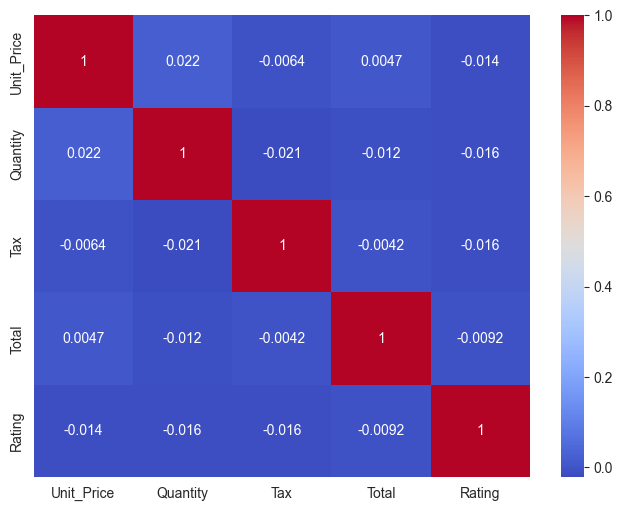

Linear Regression - MAE: 130.13039691252322 R2: -0.2290889921731747
Random Forest    - MAE: 121.24929249999997 R2: -0.04057662226501524
Supermarket Sales model saved


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")

df = pd.read_csv("../datasets/supermarket_sales.csv")
df.columns = df.columns.str.strip()

numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Replace with exact target column name in your CSV
target_col = "Total"  

df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
df[target_col].fillna(df[target_col].median(), inplace=True)

X = df.drop(target_col, axis=1)
y = df[target_col]
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_lr),
      "R2:", r2_score(y_test, y_pred_lr))
print("Random Forest    - MAE:", mean_absolute_error(y_test, y_pred_rf),
      "R2:", r2_score(y_test, y_pred_rf))

with open("supermarket_sales_model.pkl", "wb") as f:
    pickle.dump(rf, f)

print("Supermarket Sales model saved")
